In [3]:
#%% Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
plt.rcParams.update({"font.size":15})


In [5]:
#Importing the csv
data = pd.read_csv("FJR_withAGE.csv")
print(data)

      CATID   ellip   z_spec  Mstar        M_r   r_e  VSIGMA_RE  \
0      7289  0.2661  0.08682  11.12 -22.370001  4.96   0.079767   
1      7839  0.2481  0.04749  11.05 -22.100000  6.95   0.320879   
2      7969  0.1772  0.08554  11.02 -22.120001  5.17   0.080168   
3      8488  0.0642  0.01996   9.51 -18.360001  1.42        NaN   
4      8865  0.1000  0.07314  10.66 -21.160000  2.50   0.044664   
..      ...     ...      ...    ...        ...   ...        ...   
234  618947  0.2437  0.05592  10.59 -21.040001  2.29   0.198533   
235  619258  0.0775  0.05711  10.07 -19.900000  1.61   0.085919   
236  622350  0.0825  0.08733  11.10 -22.290001  4.89   0.137130   
237  623017  0.0801  0.06996  10.85 -21.709999  4.65   0.371098   
238  663440  0.1309  0.02307   9.95 -19.790001  2.36   0.085121   

     VSIGMA_RE_ERR    SIGMA_RE  SIGMA_RE_ERR  TYPE     Age_RE  Age_RE_ERR  \
0         0.007218  205.145279      1.877292   0.5   5.487696    1.974722   
1         0.004302  195.761124      1.614

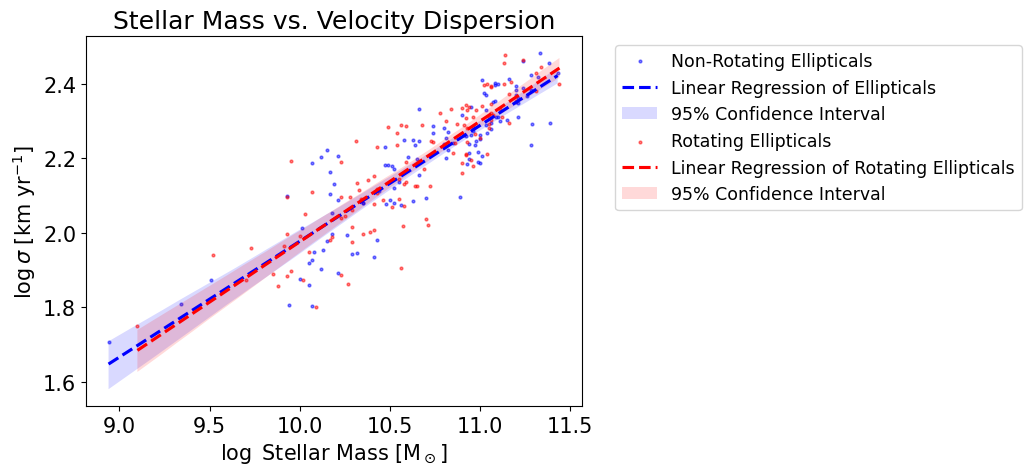

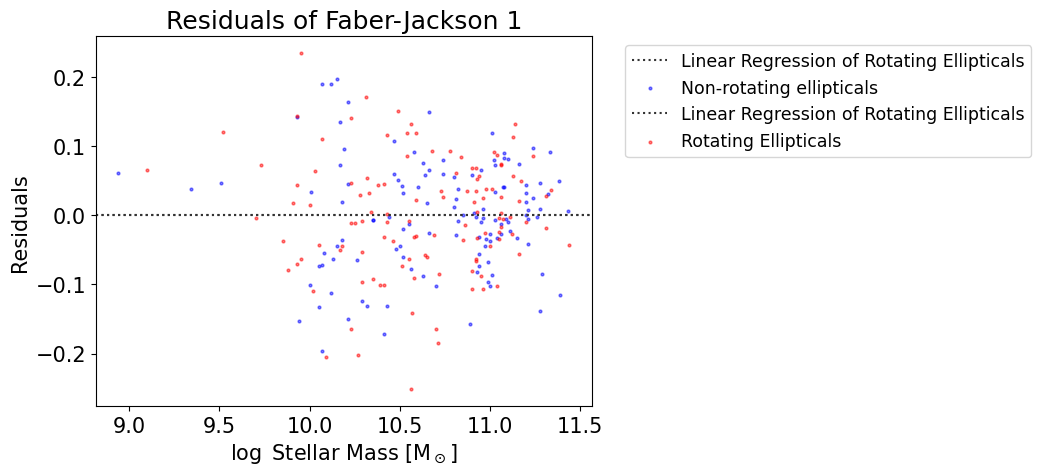

In [6]:
# Converting to numpy arrays
mass = data.Mstar.to_numpy()
sigma = data.SIGMA_RE.to_numpy()
ellip=data.TYPE.to_numpy()

# Plot
fig,ax = plt.subplots()


#Plotting with sns and Confidence interval
groups1=["Non-Rotating Ellipticals","Linear Regression of Ellipticals","95% Confidence Interval","Rotating Ellipticals","Linear Regression of Rotating Ellipticals","95% Confidence Interval"]
sns.regplot(x = mass[ellip==0], y = np.log10(sigma[ellip==0]),
            scatter_kws = {"color": "blue", "alpha": 0.5,"s":4},
            line_kws = {"color": "blue","ls":"dashed"},ci=95,label=groups1)

sns.regplot(x = mass[ellip==0.5], y = np.log10(sigma[ellip==0.5]),
            scatter_kws = {"color": "red", "alpha": 0.5,"s":4},
            line_kws = {"color": "red","ls":"dashed"},ci=95,label=groups1)

plt.legend(groups1,fontsize='small',bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylabel(r"$\log$$\sigma$ [km yr$^{-1}$]")
ax.set_xlabel(r"$\log$ Stellar Mass [M$_\odot$]")
plt.title("Stellar Mass vs. Velocity Dispersion")
plt.show()

# Residuals: Mass vs Sigma
# Plot
fig,ax = plt.subplots()


#Plotting 
groups1=["Linear Regression of Rotating Ellipticals","Non-rotating ellipticals","Linear Regression of Rotating Ellipticals","Rotating Ellipticals"]
sns.residplot(x = mass[ellip==0], y = np.log10(sigma[ellip==0]),
            scatter_kws = {"color": "blue", "alpha": 0.5,"s":4},
            line_kws = {"color": "blue","ls":"dashed"},label=groups1)

sns.residplot(x = mass[ellip==0.5], y = np.log10(sigma[ellip==0.5]),
            scatter_kws = {"color": "red", "alpha": 0.5,"s":4},
            line_kws = {"color": "red","ls":"dashed"},label=groups1)

plt.legend(groups1,fontsize='small',bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylabel(r"Residuals")
ax.set_xlabel(r"$\log$ Stellar Mass [M$_\odot$]")
plt.title("Residuals of Faber-Jackson 1")
plt.show()